In this repository we will study another phishing dataset, which may be more interesting as it contains 111 features.
Thus, we will study how dimensional reduction may influence our models performances.

To this end, we will use a dataset from this research paper: https://www.sciencedirect.com/science/article/pii/S2352340920313202

It contains 2 versions: combined "full" and combined "reduced". We will focus on the "full" version, as it may contain more challenges.

## Import

In [2]:
import os
import shutil
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

import time
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, confusion_matrix, f1_score
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from xgboost import XGBClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import GridSearchCV

### Loading dataset

Dataset downloaded from: https://data.mendeley.com/datasets/72ptz43s9v/1

From the paper:Datasets for phishing websites detection, Grega Vrbančič, Iztok Fister, Vili Podgorelec


In [4]:
# Load path to dataset
df_reduced = pd.read_csv(reduced_path)

df_reduced.info()
df_reduced.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 58645 entries, 0 to 58644
Columns: 112 entries, qty_dot_url to phishing
dtypes: float64(1), int64(111)
memory usage: 50.1 MB


,qty_dot_url,qty_hyphen_url,qty_underline_url,qty_slash_url,qty_questionmark_url,qty_equal_url,qty_at_url,qty_and_url,qty_exclamation_url,qty_space_url,...,qty_ip_resolved,qty_nameservers,qty_mx_servers,ttl_hostname,tls_ssl_certificate,qty_redirects,url_google_index,domain_google_index,url_shortened,phishing
0,2,0,0,0,0,0,0,0,0,0,...,1,4,2,3598,0,0,0,0,0,0
1,4,0,0,2,0,0,0,0,0,0,...,1,4,1,3977,1,0,0,0,0,0
2,1,0,0,1,0,0,0,0,0,0,...,1,2,1,10788,0,0,0,0,0,0
3,2,0,0,3,0,0,0,0,0,0,...,1,2,1,14339,1,0,0,0,0,1
4,1,1,0,4,0,0,0,0,0,0,...,1,2,1,389,1,1,0,0,0,1


In [5]:
# Load dataset
df_full = pd.read_csv(full_path)

df_full.info()
df_full.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 88647 entries, 0 to 88646
Columns: 112 entries, qty_dot_url to phishing
dtypes: float64(1), int64(111)
memory usage: 75.7 MB


,qty_dot_url,qty_hyphen_url,qty_underline_url,qty_slash_url,qty_questionmark_url,qty_equal_url,qty_at_url,qty_and_url,qty_exclamation_url,qty_space_url,...,qty_ip_resolved,qty_nameservers,qty_mx_servers,ttl_hostname,tls_ssl_certificate,qty_redirects,url_google_index,domain_google_index,url_shortened,phishing
0,3,0,0,1,0,0,0,0,0,0,...,1,2,0,892,0,0,0,0,0,1
1,5,0,1,3,0,3,0,2,0,0,...,1,2,1,9540,1,0,0,0,0,1
2,2,0,0,1,0,0,0,0,0,0,...,1,2,3,589,1,0,0,0,0,0
3,4,0,2,5,0,0,0,0,0,0,...,1,2,0,292,1,0,0,0,0,1
4,2,0,0,0,0,0,0,0,0,0,...,1,2,1,3597,0,1,0,0,0,0


## Data Analysis

In [21]:
df_full.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 88647 entries, 0 to 88646
Columns: 112 entries, qty_dot_url to phishing
dtypes: float64(1), int64(111)
memory usage: 75.7 MB


<ipython-input-14-476c7b974647>:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x=df_reduced["phishing"], palette="viridis")
<ipython-input-14-476c7b974647>:11: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x=df_full["phishing"], palette="viridis")


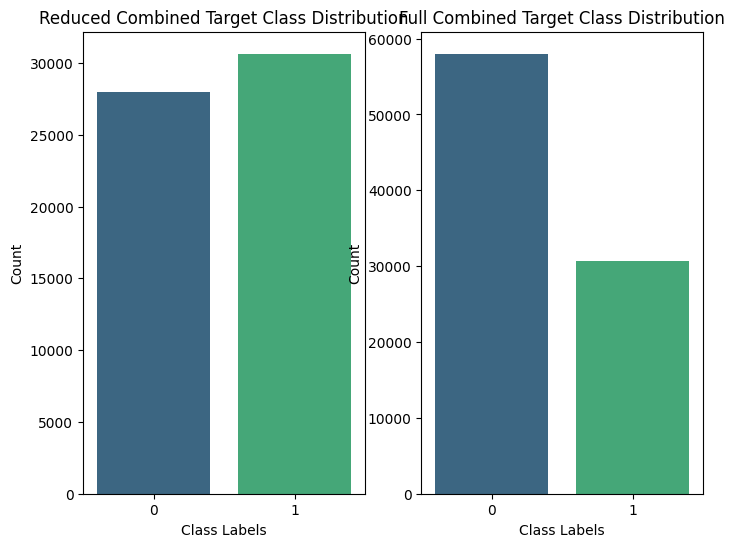

In [14]:
# Display data distribution for the 2 datasets

plt.figure(figsize=(8, 6))
plt.subplot(1, 2, 1)
sns.countplot(x=df_reduced["phishing"], palette="viridis")
plt.title("Reduced Combined Target Class Distribution")
plt.xlabel("Class Labels")
plt.ylabel("Count")

plt.subplot(1, 2, 2)
sns.countplot(x=df_full["phishing"], palette="viridis")
plt.title("Full Combined Target Class Distribution")
plt.xlabel("Class Labels")
plt.ylabel("Count")
plt.show()

The combined dataset is highly imbalanced, with the harmless websites being prevalent. Being more interesting for a study, and containing more data, we will chose this one for the rest of the study.

In [17]:
# Check missing values
print(f'Count of null values: {df_full.isna().sum()}')

Count of null values: qty_dot_url             0
qty_hyphen_url          0
qty_underline_url       0
qty_slash_url           0
qty_questionmark_url    0
                       ..
qty_redirects           0
url_google_index        0
domain_google_index     0
url_shortened           0
phishing                0
Length: 112, dtype: int64


In [22]:
print(df_full.columns)

Index(['qty_dot_url', 'qty_hyphen_url', 'qty_underline_url', 'qty_slash_url',
       'qty_questionmark_url', 'qty_equal_url', 'qty_at_url', 'qty_and_url',
       'qty_exclamation_url', 'qty_space_url',
       ...
       'qty_ip_resolved', 'qty_nameservers', 'qty_mx_servers', 'ttl_hostname',
       'tls_ssl_certificate', 'qty_redirects', 'url_google_index',
       'domain_google_index', 'url_shortened', 'phishing'],
      dtype='object', length=112)


In [25]:
df_full['qty_at_url'].unique()

array([ 0,  1,  3,  4, 10,  2, 43,  5, 14, 12, 11, 15,  7,  6,  8])

In [8]:
# Drop columns having a unique value
def drop_constant_columns(df):
    """
    Drops columns that have only a single unique value.
    """
    constant_columns = [col for col in df.columns if df[col].nunique() == 1]

    if constant_columns:
        print(f"Dropping {len(constant_columns)} constant columns with a unique value:")
        print(constant_columns)
        df = df.drop(columns=constant_columns)
    else:
        print("No constant columns found.")

    return df

df_full = drop_constant_columns(df_full)

Dropping 13 constant columns with a unique value:
['qty_slash_domain', 'qty_questionmark_domain', 'qty_equal_domain', 'qty_and_domain', 'qty_exclamation_domain', 'qty_space_domain', 'qty_tilde_domain', 'qty_comma_domain', 'qty_plus_domain', 'qty_asterisk_domain', 'qty_hashtag_domain', 'qty_dollar_domain', 'qty_percent_domain']


In [7]:
print(f'New shape: {df_full.shape}')

New shape: (88647, 99)


In [28]:
def corr_heatmap(data, idx_s, idx_e):
    y = data['phishing']
    temp = data.iloc[:, idx_s:idx_e]
    if 'id' in temp.columns:
        del temp['id']
    temp['labels'] = y
    sns.heatmap(temp.corr(), annot=True, fmt='.2f')

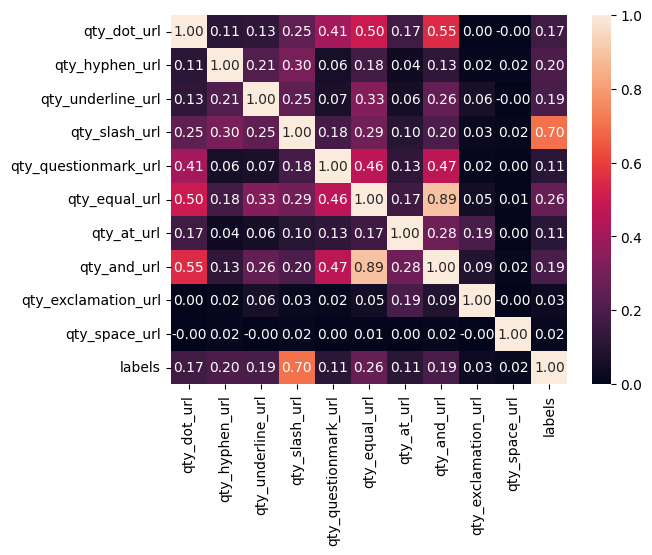

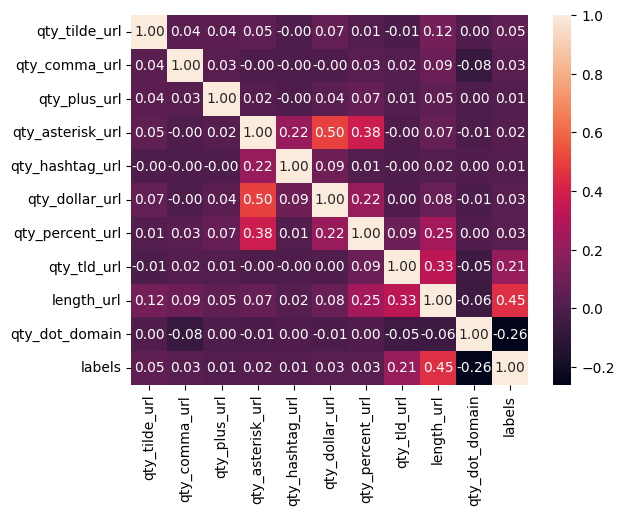

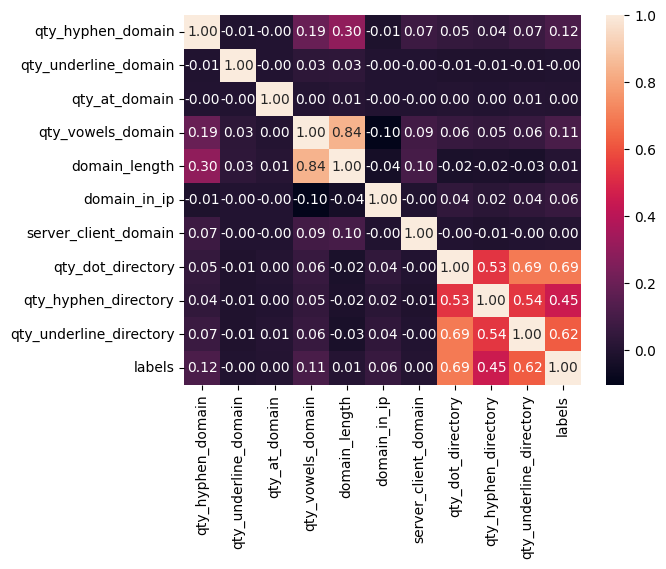

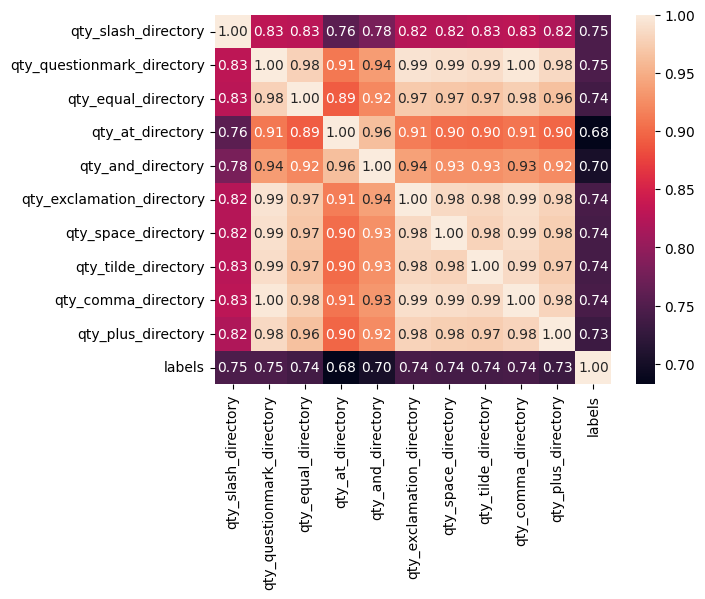

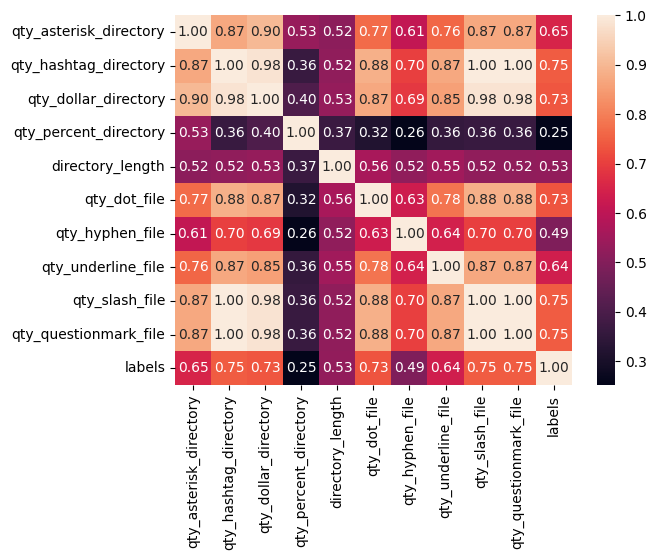

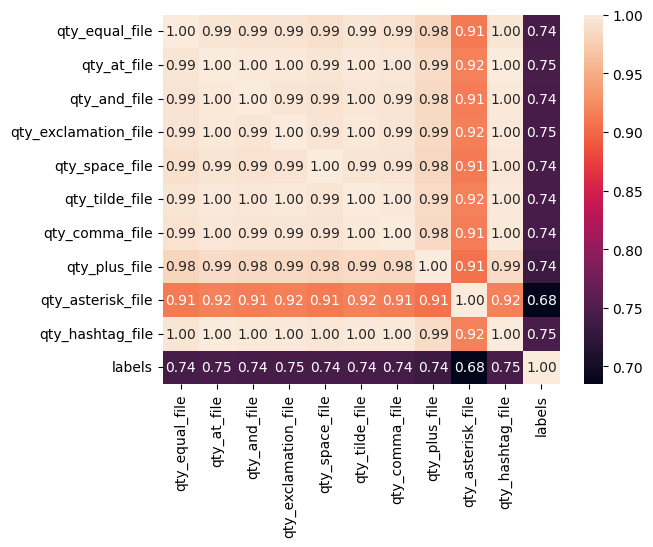

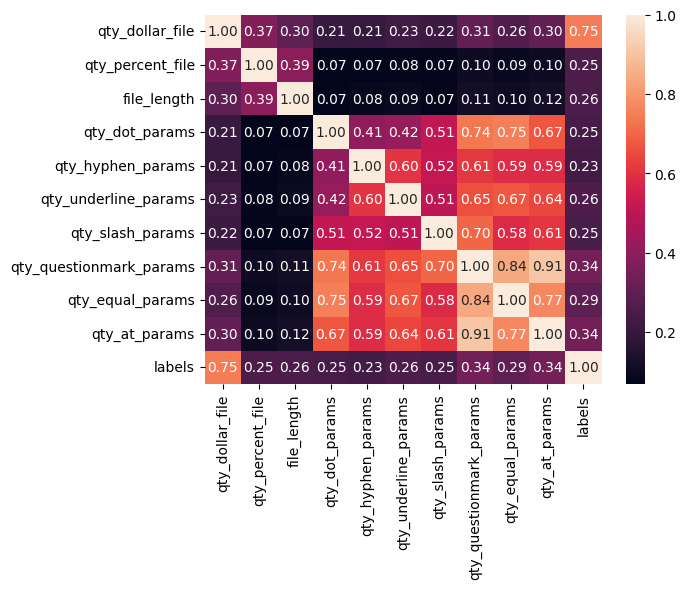

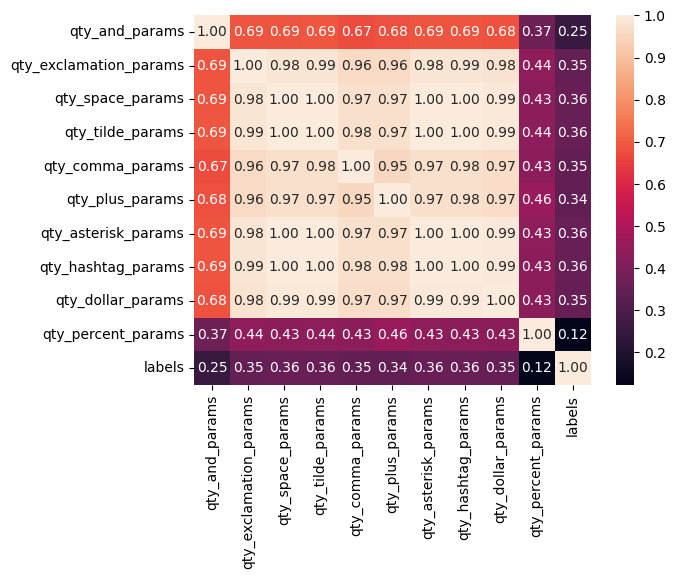

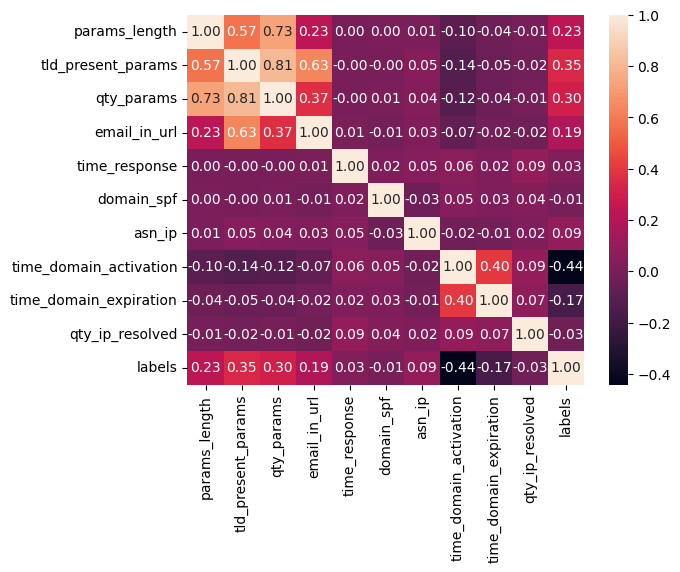

In [44]:
for i in range(9):
    start_idx = i * 10
    end_idx = min((i + 1) * 10, 111)
    corr_heatmap(df_full, start_idx, end_idx)
    plt.show()

A lot of highly correlated features.
First, let's drop those being higly correlated to the target feature, meaning:qty_plus_file, qty_hashtag_file, qty_dollar_file, qty_comma_file, qty_questionmark_file, qty_equal_file, ...

In [9]:
correlation_with_target = df_full.corr()['phishing'].abs()
print(correlation_with_target.sort_values(ascending=False))
threshold = 0.75
features_to_drop = correlation_with_target[correlation_with_target > threshold].index.tolist()
features_to_drop.remove('phishing')  # Ensure target column is not removed

print(f"Dropping {len(features_to_drop)} features highly correlated with the target (>{threshold}):")
print(features_to_drop)

# Drop the features from the dataset
df = df_full.drop(columns=features_to_drop)

phishing                1.000000
qty_slash_directory     0.746454
qty_dollar_file         0.745644
qty_hashtag_file        0.745644
qty_slash_file          0.745644
                          ...   
domain_spf              0.005582
qty_at_domain           0.004621
qty_underline_domain    0.004514
server_client_domain    0.002855
domain_google_index     0.000794
Name: phishing, Length: 99, dtype: float64
Dropping 0 features highly correlated with the target (>0.75):
[]


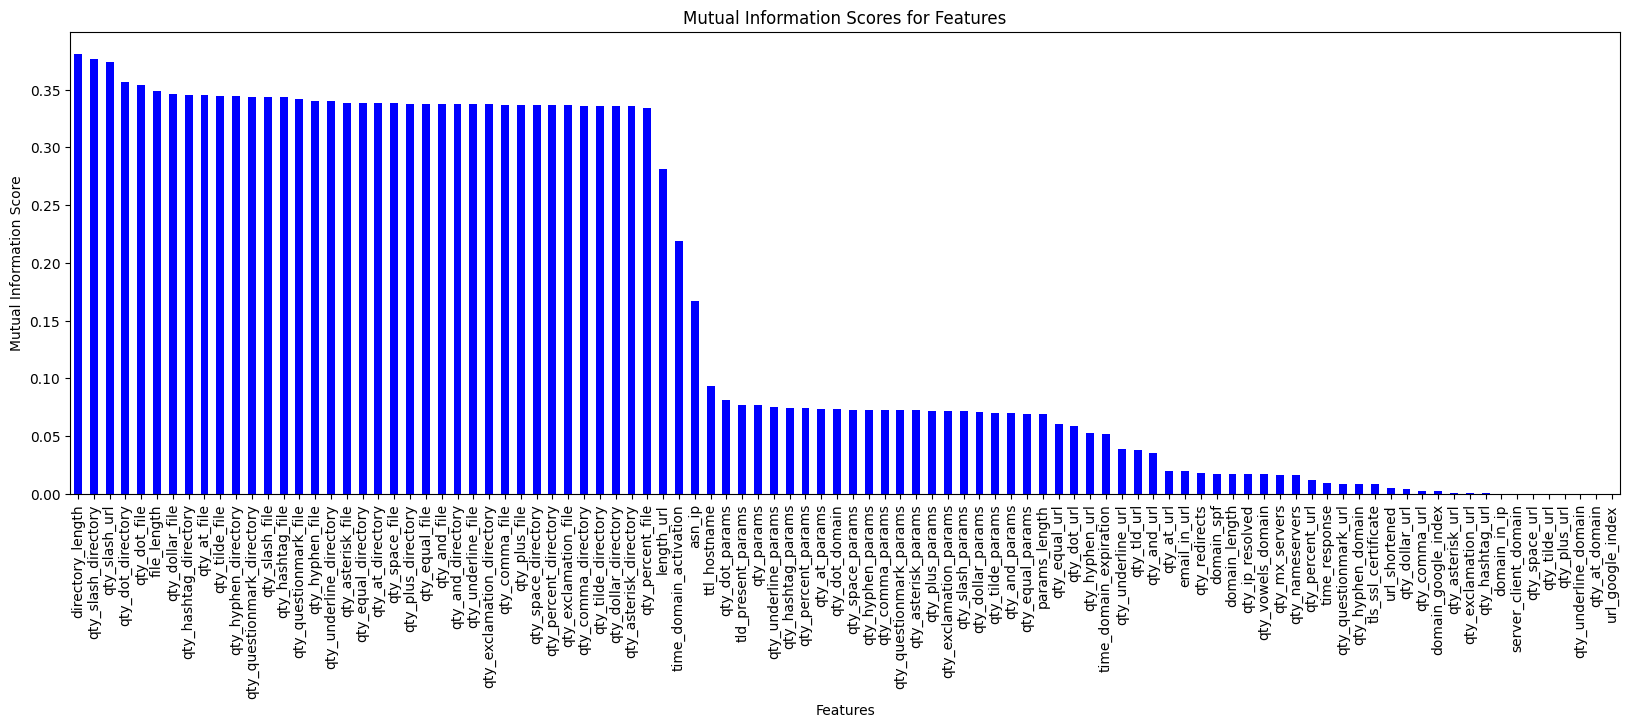

In [10]:
# Dropping features

#Let's compute the Mutual Information
from sklearn.feature_selection import mutual_info_classif
import pandas as pd
import matplotlib.pyplot as plt

X = df.drop(columns=['phishing'])
y = df['phishing']

mi_scores = mutual_info_classif(X, y)
mi_scores = pd.Series(mi_scores, index=X.columns).sort_values(ascending=False)

# Plot
plt.figure(figsize=(20, 6))
mi_scores.plot(kind="bar", color="blue")
plt.title("Mutual Information Scores for Features")
plt.xlabel("Features")
plt.ylabel("Mutual Information Score")
plt.xticks(rotation=90)
plt.show()

In [8]:
# Remove features having a very low mutual information
low_mi_features = mi_scores[mi_scores < 0.01].index.tolist()

if low_mi_features:
    print(f"Dropping {len(low_mi_features)} features with MI scores below {0.01}:")
    print(low_mi_features)
    df = df.drop(columns=low_mi_features)
else:
    print("No features have MI scores below the threshold.")

Dropping 18 features with MI scores below 0.01:
['qty_hyphen_domain', 'qty_percent_url', 'url_shortened', 'qty_questionmark_url', 'domain_in_ip', 'server_client_domain', 'qty_tilde_url', 'qty_exclamation_url', 'qty_dollar_url', 'qty_space_url', 'qty_hashtag_url', 'domain_google_index', 'qty_comma_url', 'qty_plus_url', 'qty_asterisk_url', 'qty_underline_domain', 'qty_at_domain', 'url_google_index']


In [49]:
print(f'New shape: {df.shape}')

New shape: (88647, 81)


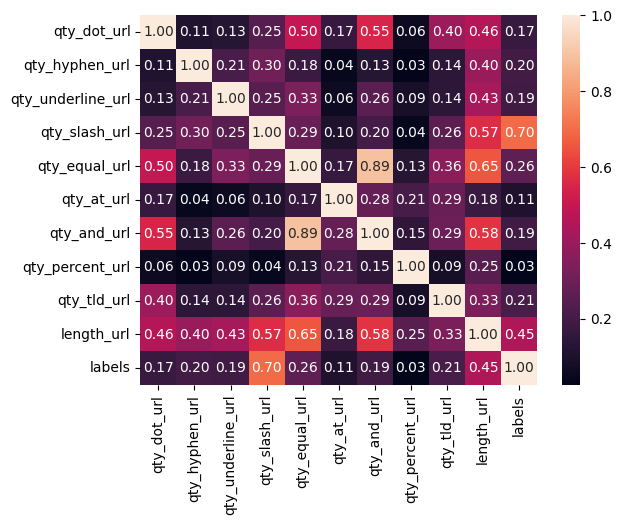

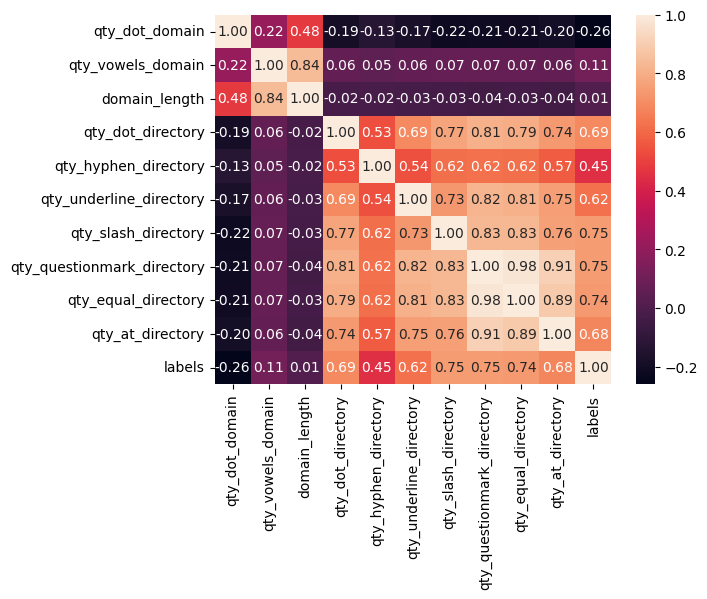

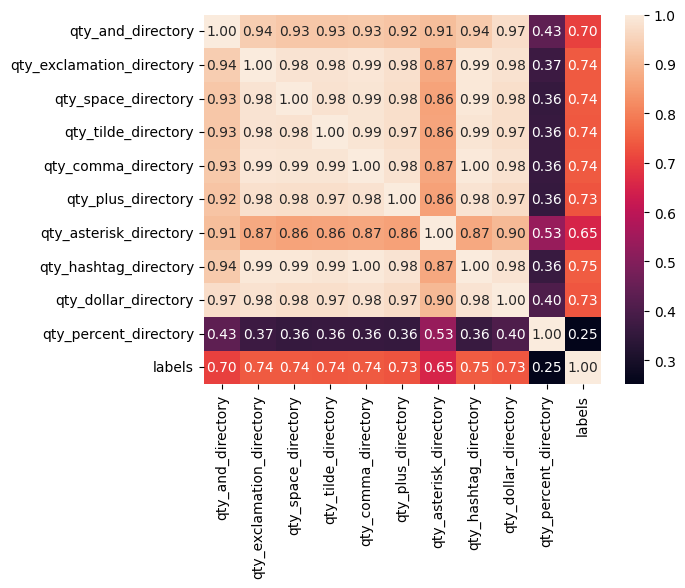

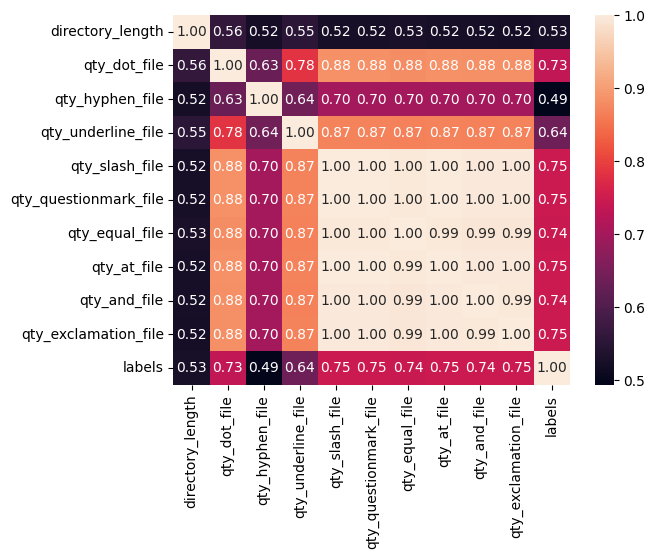

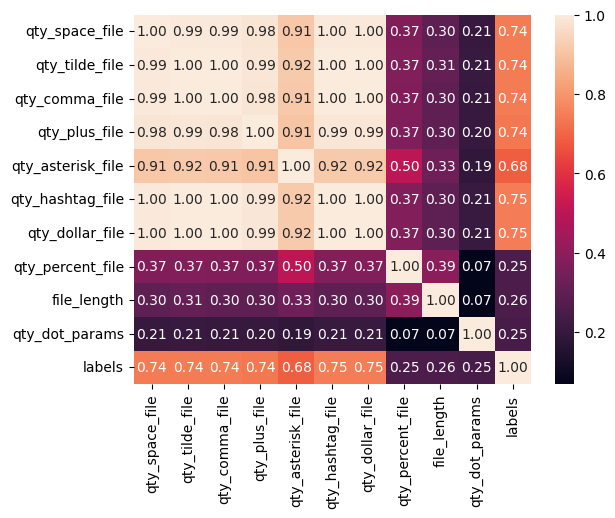

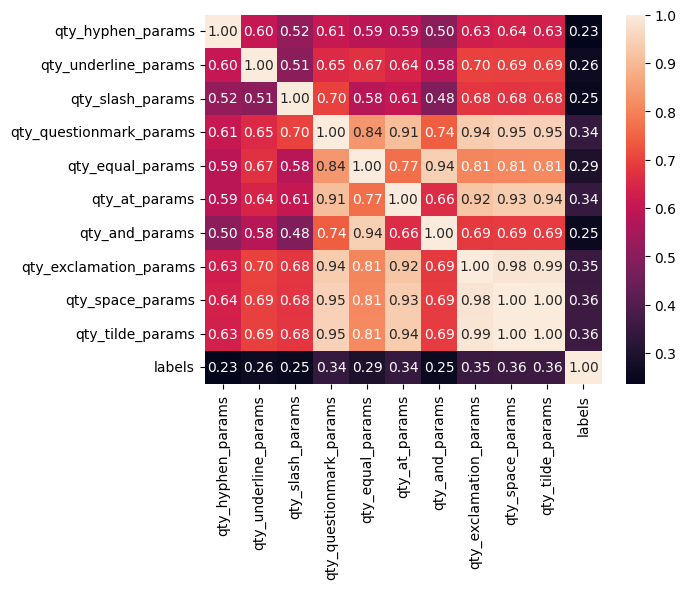

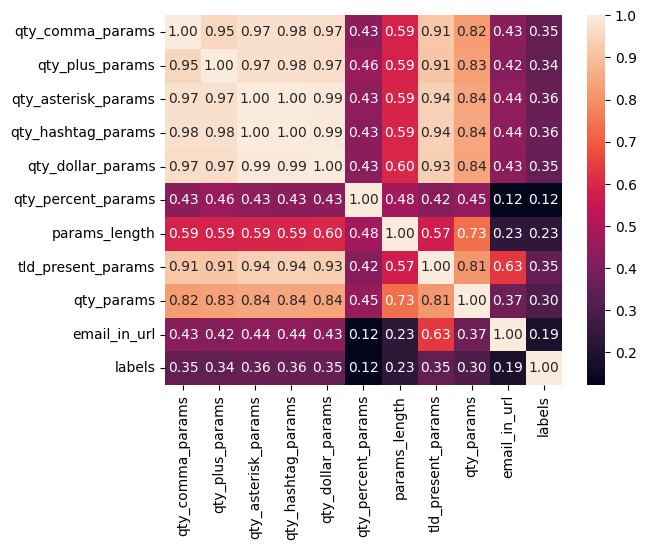

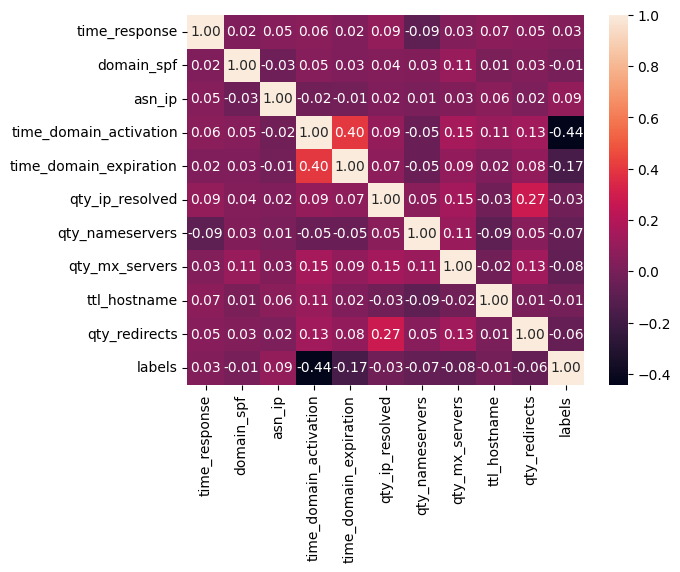

In [50]:
# Visualize the correlation of the remaining features
for i in range(8):
    start_idx = i * 10
    end_idx = min((i + 1) * 10, 111)
    corr_heatmap(df, start_idx, end_idx)
    plt.show()

There are still features that remain highly correlated to each other (more than 0.9) which can mislead a model.

Due to their high number, we will drop them automatically based on how much they are involved in a model's deicision process (mutual information).

In [11]:
def drop_highly_correlated_features_mi(df, mi_scores, threshold):
    """
    Drops highly correlated features while preserving the one with the highest MI score.
    """
    corr_matrix = df.corr().abs()
    upper_tri = corr_matrix.where(np.triu(np.ones(corr_matrix.shape), k=1).astype(bool))

    features_to_drop = set()
    for column in upper_tri.columns:
        highly_correlated = upper_tri[column][upper_tri[column] > threshold].index.tolist()
        if highly_correlated:
            # Compare MI scores and keep the most important feature
            features_with_mi = {feature: mi_scores[feature] for feature in highly_correlated + [column]}
            feature_to_keep = max(features_with_mi, key=features_with_mi.get)
            features_to_drop.update(set(features_with_mi.keys()) - {feature_to_keep})

    print(f"Dropping {len(features_to_drop)} highly correlated features (correlation > {threshold}):")
    print(list(features_to_drop))

    df = df.drop(columns=features_to_drop)
    return df

df = drop_highly_correlated_features_mi(df, mi_scores, threshold=0.8)

Dropping 49 highly correlated features (correlation > 0.8):
['qty_hashtag_file', 'qty_and_url', 'qty_hashtag_directory', 'qty_plus_directory', 'qty_dot_file', 'qty_space_file', 'qty_dot_directory', 'qty_equal_directory', 'qty_underline_directory', 'qty_underline_file', 'qty_comma_directory', 'qty_and_file', 'qty_tilde_file', 'qty_plus_params', 'qty_and_params', 'params_length', 'qty_questionmark_directory', 'qty_questionmark_params', 'qty_and_directory', 'qty_questionmark_file', 'qty_comma_file', 'qty_plus_file', 'qty_equal_url', 'qty_asterisk_directory', 'qty_hashtag_params', 'qty_equal_params', 'qty_percent_file', 'qty_hyphen_file', 'qty_params', 'qty_equal_file', 'qty_tilde_params', 'qty_comma_params', 'qty_space_directory', 'qty_slash_url', 'qty_at_file', 'qty_exclamation_params', 'qty_at_directory', 'qty_space_params', 'qty_dollar_file', 'qty_asterisk_file', 'qty_vowels_domain', 'qty_dollar_directory', 'qty_at_params', 'qty_slash_file', 'qty_asterisk_params', 'qty_dollar_params', 

In [14]:
print(f'New shape: {df.shape}')

New shape: (88647, 33)


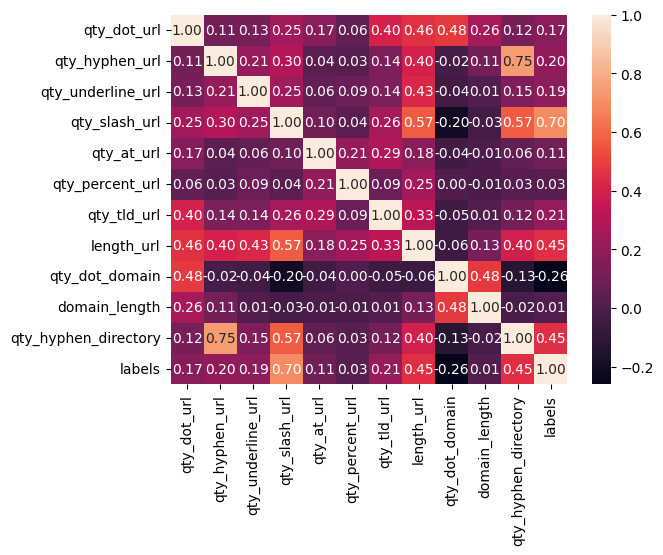

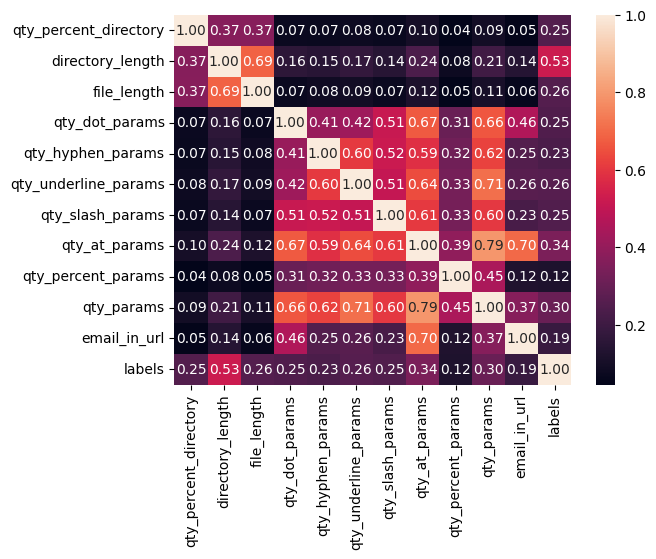

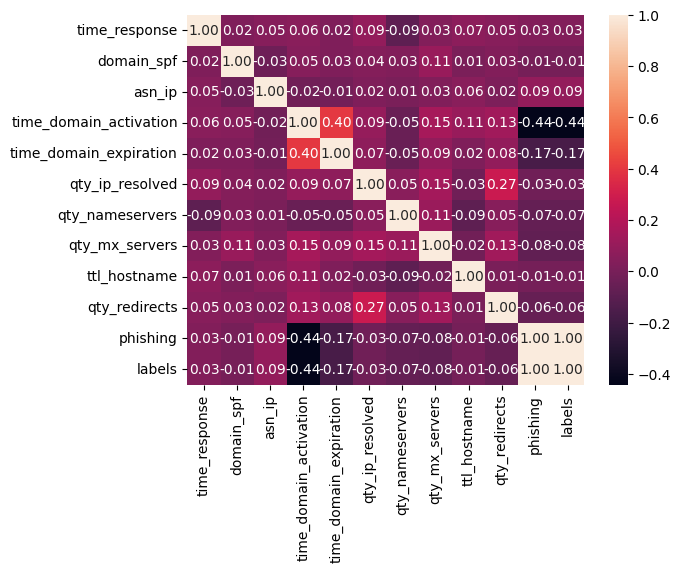

In [53]:
# Last checkup of the correlation matrix

for i in range(3):
    start_idx = i * 11
    end_idx = min((i + 1) * 11, 33)
    corr_heatmap(df, start_idx, end_idx)
    plt.show()

### Train / test split

In [12]:
# Save new df
df.to_csv("df.csv", index=False)

In [6]:
# Load df
df = pd.read_csv("df.csv")

FileNotFoundError: [Errno 2] No such file or directory: 'df.csv'

In [13]:
X = df.drop(columns=["phishing"])
y = df["phishing"]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

## Model Benchmark

Due to the imbalance nature of the dataset, f1-score will be used as a metric. Time and the FalseNegativeRate (= Phishing websites being classified as harmless, that we want to minimize) will also help us select the more performant model.

### Baseline: logistic regression

Let's start by studying the performances of a simple logistic regression.

In [75]:
# Simple linear separability model

logreg = LogisticRegression(max_iter=500, solver='liblinear')
logreg.fit(X_train, y_train)

# Make predictions
y_pred_log = logreg.predict(X_test)

# Evaluate using F1-score
f1 = f1_score(y_test, y_pred_log, average="weighted")
print(f"F1-score: {f1:.4f}")

print("Logistic Regression Accuracy:", accuracy_score(y_test, y_pred_log))

F1-score: 0.9222
Logistic Regression Accuracy: 0.9222786238014664


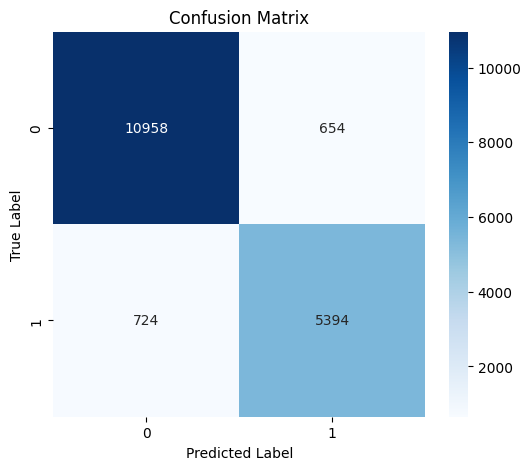

In [76]:
# Confusion matrix
cm = confusion_matrix(y_test, y_pred_log)

# Plot confusion matrix
plt.figure(figsize=(6,5))
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues", xticklabels=set(y_test), yticklabels=set(y_test))
plt.xlabel("Predicted Label")
plt.ylabel("True Label")
plt.title("Confusion Matrix")
plt.show()

## Comparaison

Now, let's see if the Random Forest and the XGBoost can achieve better results. Those are interesting as Random Forest can handle correlated data and XGBoost performance can be enhanced when using a GPU.

In [14]:
# Aim to minimize the FalseNegativeRate (= Phishing websites being classified as harmless)

models = {
    "Logistic Regression": LogisticRegression(max_iter=1000, solver="liblinear"),
    "Random Forest": RandomForestClassifier(n_estimators=100, random_state=42),
    "XGBoost": XGBClassifier(use_label_encoder=False, eval_metric="logloss", random_state=42)
}

results = []

# Train & evaluate models
for name, model in models.items():
    print(f"Training {name}...")

    start_time = time.time()
    model.fit(X_train, y_train)
    training_time = time.time() - start_time

    y_pred = model.predict(X_test)

    # Compute F1-score
    f1 = f1_score(y_test, y_pred, average="weighted")

    # Compute False Positive Rate (FPR)
    cm = confusion_matrix(y_test, y_pred)
    FN = cm.sum(axis=1) - np.diag(cm)
    TP = np.diag(cm)
    FNR = FN / (FN + TP)
    mean_FNR = np.mean(FNR)

    results.append({
        "Model": name,
        "F1-score": f1,
        "False Negative Rate (FNR)": mean_FNR,
        "Training Time (seconds)": training_time
    })

df_results = pd.DataFrame(results)



Training Logistic Regression...
Training Random Forest...
Training XGBoost...


/usr/local/lib/python3.11/dist-packages/xgboost/core.py:158: UserWarning: [21:58:16] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)


<ipython-input-19-c345416bbe03>:7: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x="Model", y="F1-score", data=df, palette="coolwarm")
<ipython-input-19-c345416bbe03>:13: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x="Model", y="False Negative Rate (FNR)", data=df, palette="viridis")
<ipython-input-19-c345416bbe03>:19: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x="Model", y="Training Time (seconds)", data=df, palette="magma")


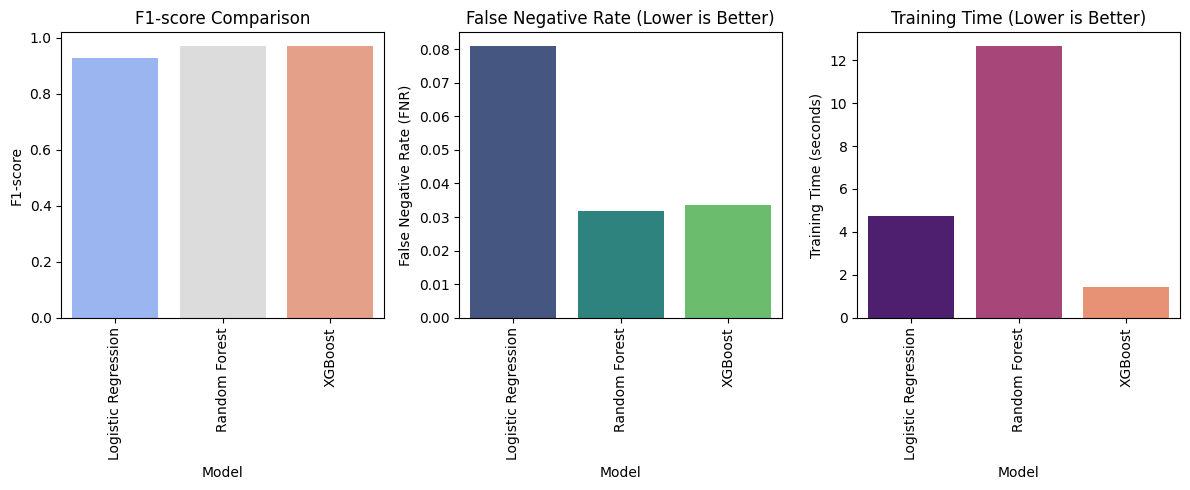

In [19]:
# Plot performance comparison
def plot_comparison(df):
  plt.figure(figsize=(12, 5))

  # F1-score
  plt.subplot(1, 3, 1)
  sns.barplot(x="Model", y="F1-score", data=df, palette="coolwarm")
  plt.title("F1-score Comparison")
  plt.xticks(rotation=90)

  # FNR
  plt.subplot(1, 3, 2)
  sns.barplot(x="Model", y="False Negative Rate (FNR)", data=df, palette="viridis")
  plt.title("False Negative Rate (Lower is Better)")
  plt.xticks(rotation=90)

  # Training Time
  plt.subplot(1, 3, 3)
  sns.barplot(x="Model", y="Training Time (seconds)", data=df, palette="magma")
  plt.title("Training Time (Lower is Better)")
  plt.xticks(rotation=90)

  plt.tight_layout()
  plt.show()


plot_comparison(df_results)

All models achieve a very good f1-scores, but the Random Forest and XGBoost are slightly better than the Logisitc Regression. XGBoost is slightly outperformed by the Logistic Regression on the False Negative Rate but is with Random Forest 5 times faster dutring the training time than the Logistic regression. However, XGBoost achive by far a lower FNR than Random Forest.

We will then futher stufy XGBoost performances.

### XGBoost analyses

Let's dive into the XGBoost training performances.

#### Hyperparameters tuning

In [15]:
# Find the optimal hyperparameters

param_grid = {
    "n_estimators": [10, 50, 100],
    "max_depth": [3, 6, 9],
    "learning_rate": [0.01, 0.1, 0.3],
}

grid_search = GridSearchCV(
    XGBClassifier(use_label_encoder=False, eval_metric="logloss"),
    param_grid,
    cv=3,
    scoring="f1_weighted",
    verbose=1,
    n_jobs=-1
)

grid_search.fit(X_train, y_train)

best_xgb = grid_search.best_estimator_
print("Best parameters found:", grid_search.best_params_)

Fitting 3 folds for each of 27 candidates, totalling 81 fits


KeyboardInterrupt: 

Best parameters found: {'learning_rate': 0.3, 'max_depth': 9, 'n_estimators': 100}

#### Loss curve

/usr/local/lib/python3.11/dist-packages/xgboost/core.py:158: UserWarning: [22:00:13] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)


Training time = 3.5984694957733154


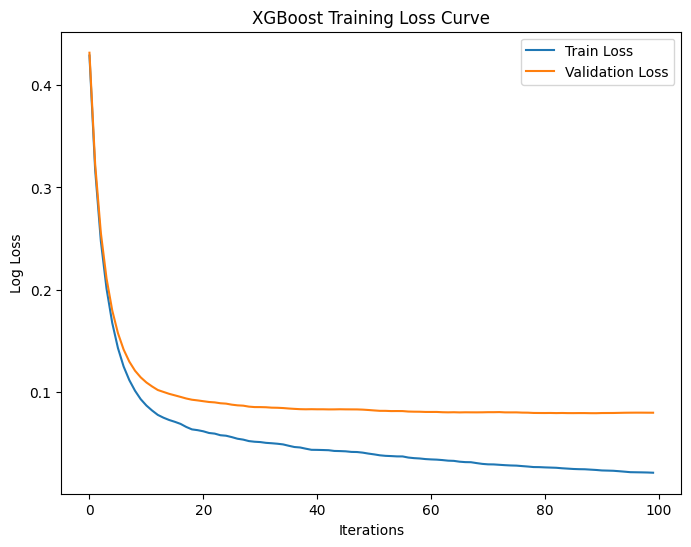

In [23]:
# Plot loss curve
best_xgb = XGBClassifier(
    use_label_encoder=False,
    objective="binary:logistic",
    eval_metric="logloss",
    random_state=42,
    learning_rate=0.3,
    max_depth=9,
    n_estimators=100
)
start_time = time.time()
best_xgb.fit(
    X_train, y_train,
    eval_set=[(X_train, y_train), (X_test, y_test)],
    verbose=False,
)
best_train_time = time.time() - start_time
print(f"Training time = {best_train_time}")
evals_result = best_xgb.evals_result()

plt.figure(figsize=(8,6))
plt.plot(evals_result["validation_0"]["logloss"], label="Train Loss")
plt.plot(evals_result["validation_1"]["logloss"], label="Validation Loss")
plt.xlabel("Iterations")
plt.ylabel("Log Loss")
plt.title("XGBoost Training Loss Curve")
plt.legend()
plt.show()

The depth of 9 can explain the augmentation of the training time, so we will reduce it to 6 and see how it performs.

In [17]:
early_xgb = XGBClassifier(
    use_label_encoder=False,
    objective="binary:logistic",
    eval_metric="logloss",
    random_state=42,
    learning_rate=0.3,
    max_depth=6,
    n_estimators=100
)
start_time = time.time()
early_xgb.fit(
    X_train, y_train,
    eval_set=[(X_train, y_train), (X_test, y_test)],
    verbose=False,
)
early_train_time = time.time() - start_time


early_result = early_xgb.evals_result()



/usr/local/lib/python3.11/dist-packages/xgboost/core.py:158: UserWarning: [21:59:02] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)


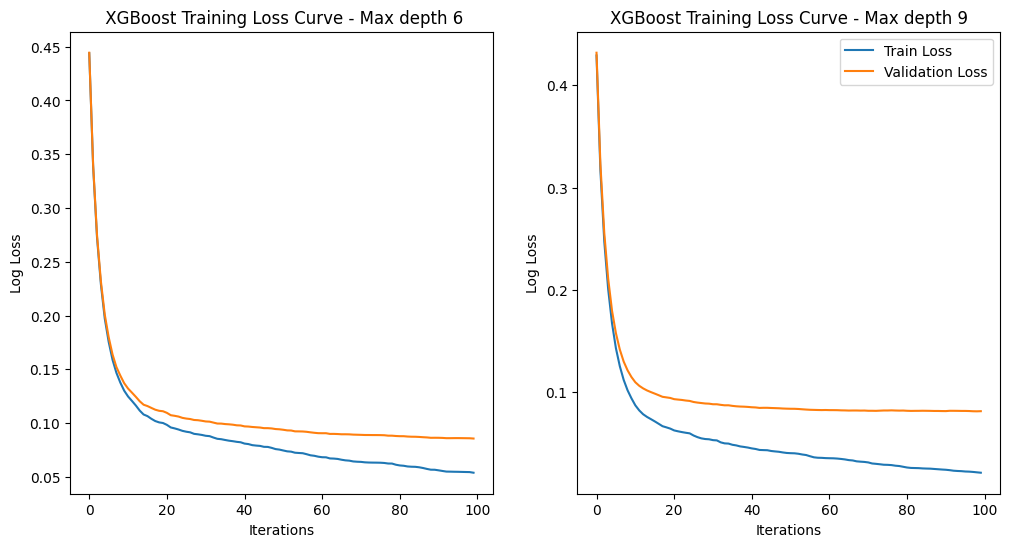

In [83]:
#plot loss curve
plt.figure(figsize=(12,6))
plt.subplot(1,2,1)
plt.plot(early_result["validation_0"]["logloss"], label="Train Loss")
plt.plot(early_result["validation_1"]["logloss"], label="Validation Loss")
plt.xlabel("Iterations")
plt.ylabel("Log Loss")
plt.title(" XGBoost Training Loss Curve - Max depth 6")

plt.subplot(1,2,2)
plt.plot(evals_result["validation_0"]["logloss"], label="Train Loss")
plt.plot(evals_result["validation_1"]["logloss"], label="Validation Loss")
plt.xlabel("Iterations")
plt.ylabel("Log Loss")
plt.title("XGBoost Training Loss Curve - Max depth 9")
plt.legend()

In [22]:
early_train_time

5.97474479675293

<ipython-input-19-c345416bbe03>:7: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x="Model", y="F1-score", data=df, palette="coolwarm")
<ipython-input-19-c345416bbe03>:13: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x="Model", y="False Negative Rate (FNR)", data=df, palette="viridis")
<ipython-input-19-c345416bbe03>:19: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x="Model", y="Training Time (seconds)", data=df, palette="magma")


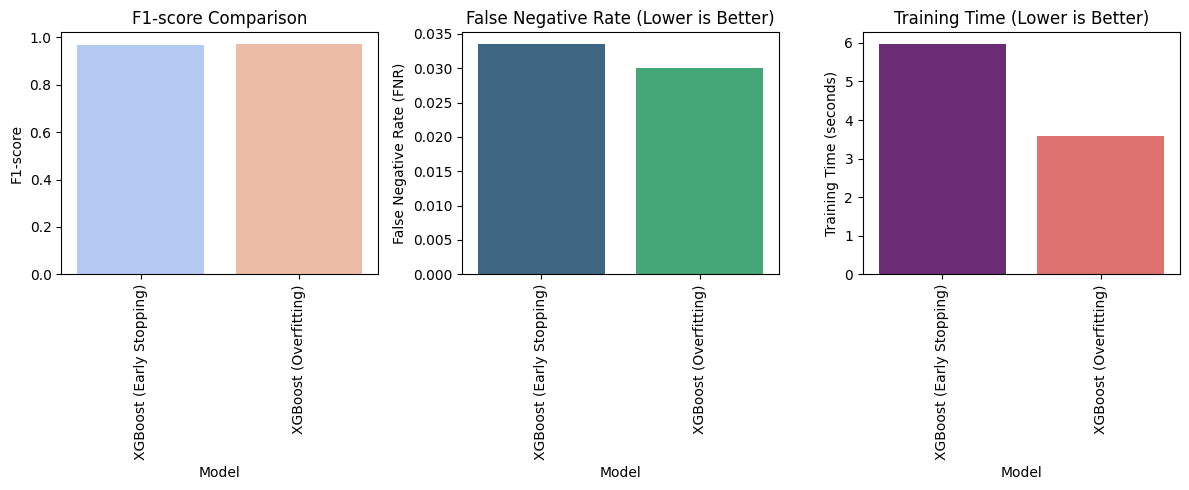

In [24]:
# evaluate predicitons on the test set

y_pred_early = early_xgb.predict(X_test)
y_pred_overfit = best_xgb.predict(X_test)
f1_early = f1_score(y_test, y_pred_early, average="weighted")
f1_overfit = f1_score(y_test, y_pred_overfit, average="weighted")

def compute_fnr(y_true, y_pred):
    cm = confusion_matrix(y_true, y_pred)
    FN = cm.sum(axis=1) - np.diag(cm)
    TP = np.diag(cm)
    FNR = FN / (FN + TP)
    return np.mean(FNR)

fpr_early = compute_fnr(y_test, y_pred_early)
fpr_overfit = compute_fnr(y_test, y_pred_overfit)

# Store results
comparison_df = pd.DataFrame({
    "Model": ["XGBoost (Early Stopping)", "XGBoost (Overfitting)"],
    "F1-score": [f1_early, f1_overfit],
    "False Negative Rate (FNR)": [fpr_early, fpr_overfit],
    "Training Time (seconds)": [early_train_time, best_train_time]
})

# plot comparison
plot_comparison(comparison_df)

<ipython-input-19-c345416bbe03>:7: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x="Model", y="F1-score", data=df, palette="coolwarm")
<ipython-input-19-c345416bbe03>:13: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x="Model", y="False Negative Rate (FNR)", data=df, palette="viridis")
<ipython-input-19-c345416bbe03>:19: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x="Model", y="Training Time (seconds)", data=df, palette="magma")


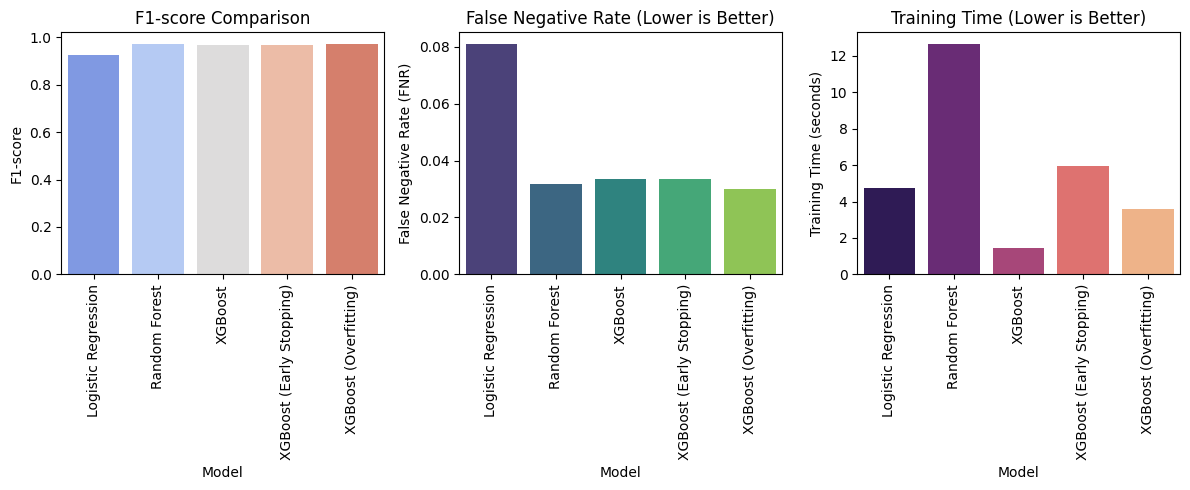

In [25]:
merged_df = pd.concat([df_results, comparison_df], ignore_index=True)
plot_comparison(merged_df)

The "tuned" model achieves slightly lower FNR results while requiring a higher training time, but still train faster than random forest, but remains the second fastest model to train?.

As we look to minimize the FNR, we will study if removing some features could helped the tuned model to reduce its traning time while keeping its prediciton performances.

#### Feature importance

Let's analyze which features contribute most to XGBoost predictions

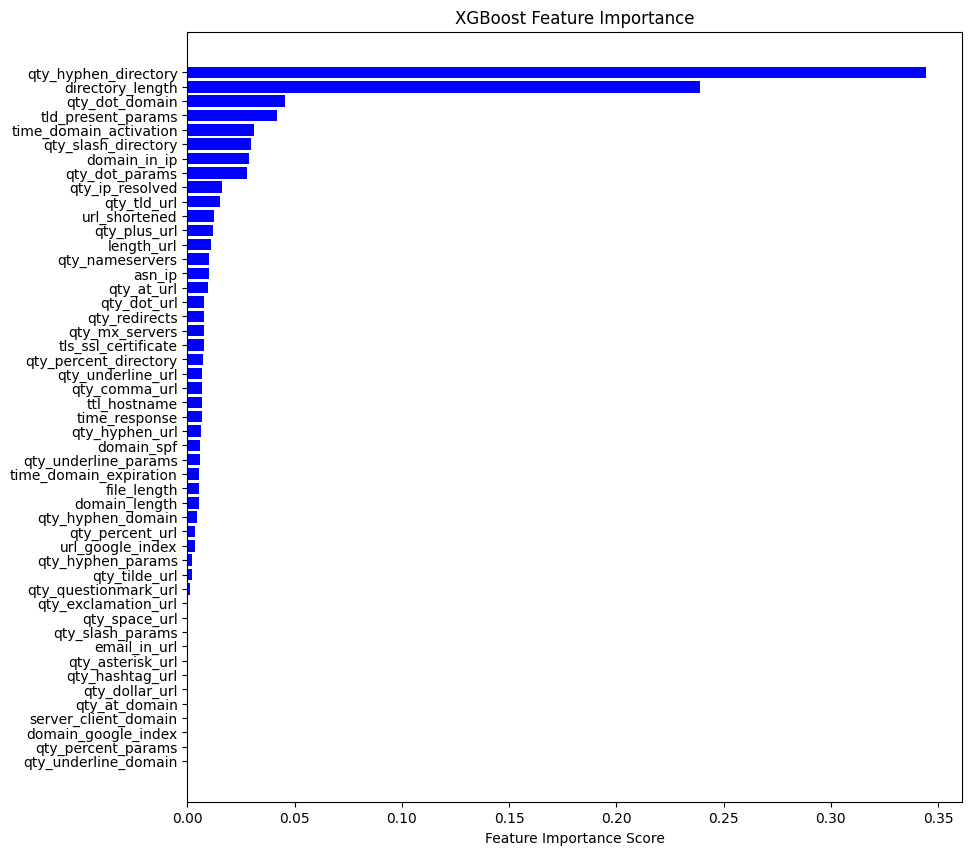

In [26]:
importances = best_xgb.feature_importances_
features = X_train.columns


sorted_idx = importances.argsort()
plt.figure(figsize=(10,10))
plt.barh(features[sorted_idx], importances[sorted_idx], color="blue")
plt.xlabel("Feature Importance Score")
plt.title("XGBoost Feature Importance")
plt.show()

Some features seem to have a very low importance. We will try to drop them and see how this will impact the model's performances. This may improve the training time of our model.

In [27]:
# Drop non important features
threshold = 0.01
low_importance_features = np.where(importances < threshold)[0]
low_importance_feature_names = X_train.columns[low_importance_features]

print(f"Dropping {len(low_importance_feature_names)} low-importance features (importance < {threshold}):")
print(list(low_importance_feature_names))

# Drop features from datasets
X_train_filtered = X_train.drop(columns=low_importance_feature_names)
X_test_filtered = X_test.drop(columns=low_importance_feature_names)

Dropping 35 low-importance features (importance < 0.01):
['qty_dot_url', 'qty_hyphen_url', 'qty_underline_url', 'qty_questionmark_url', 'qty_at_url', 'qty_exclamation_url', 'qty_space_url', 'qty_tilde_url', 'qty_comma_url', 'qty_asterisk_url', 'qty_hashtag_url', 'qty_dollar_url', 'qty_percent_url', 'qty_hyphen_domain', 'qty_underline_domain', 'qty_at_domain', 'domain_length', 'server_client_domain', 'qty_percent_directory', 'file_length', 'qty_hyphen_params', 'qty_underline_params', 'qty_slash_params', 'qty_percent_params', 'email_in_url', 'time_response', 'domain_spf', 'asn_ip', 'time_domain_expiration', 'qty_mx_servers', 'ttl_hostname', 'tls_ssl_certificate', 'qty_redirects', 'url_google_index', 'domain_google_index']


In [25]:
print(f'New shape: {X_train_filtered.shape}')

New shape: (70917, 13)


(This seems quite a huge number)

/usr/local/lib/python3.11/dist-packages/xgboost/core.py:158: UserWarning: [22:01:34] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)


Training time = 1.6001198291778564


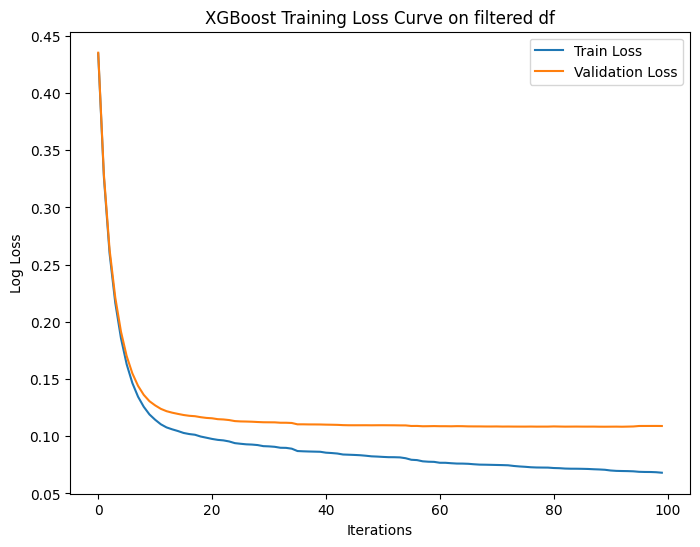

In [28]:
# Let's evaluate the model on this reduced dataset
start_time = time.time()
best_xgb.fit(
    X_train_filtered, y_train,
    eval_set=[(X_train_filtered, y_train), (X_test_filtered, y_test)],
    verbose=False,
)
best_train_time = time.time() - start_time
print(f"Training time = {best_train_time}")
evals_result = best_xgb.evals_result()

plt.figure(figsize=(8,6))
plt.plot(evals_result["validation_0"]["logloss"], label="Train Loss")
plt.plot(evals_result["validation_1"]["logloss"], label="Validation Loss")
plt.xlabel("Iterations")
plt.ylabel("Log Loss")
plt.title("XGBoost Training Loss Curve on filtered df")
plt.legend()
plt.show()

In [29]:
merged_df.to_csv("merged_df.csv", index=False)

In [31]:
y_pred_filtered = best_xgb.predict(X_test_filtered)
f1_filtered = f1_score(y_test, y_pred_filtered, average="weighted")
fpr_filtered = compute_fnr(y_test, y_pred_filtered)

print(f"F1-score on filtered df: {f1_filtered}")
print(f"False Negative Rate (FNR) on filtered df: {fpr_filtered}")

F1-score on filtered df: 0.960588205288595
False Negative Rate (FNR) on filtered df: 0.04328367234490546


In [32]:
merged_df

,Model,F1-score,False Negative Rate (FNR),Training Time (seconds)
0,Logistic Regression,0.926634,0.080999,4.745003
1,Random Forest,0.970202,0.031710,12.663780
2,XGBoost,0.969058,0.033538,1.453845
3,XGBoost (Early Stopping),0.969058,0.033538,5.974745
4,XGBoost (Overfitting),0.972048,0.030096,3.598469


In [33]:
filter_df = pd.DataFrame({
    "Model": ["XGBoost (Filter ds)"],
    "F1-score": [f1_filtered],
    "False Negative Rate (FNR)": [fpr_filtered],
    "Training Time (seconds)": [best_train_time]
})

merged_df = pd.concat([merged_df, filter_df], ignore_index=True)
merged_df.to_csv("merged_df.csv", index=False)

Even if training time is significantly lower, we lost performance on the FNR: the tuned model achieved a FNR of 0.030 on the full dataset, but 0.035 on the reduced one.

#### SHAP and explainability

SHAP explains individual predictions, by showing feature impact at a local level

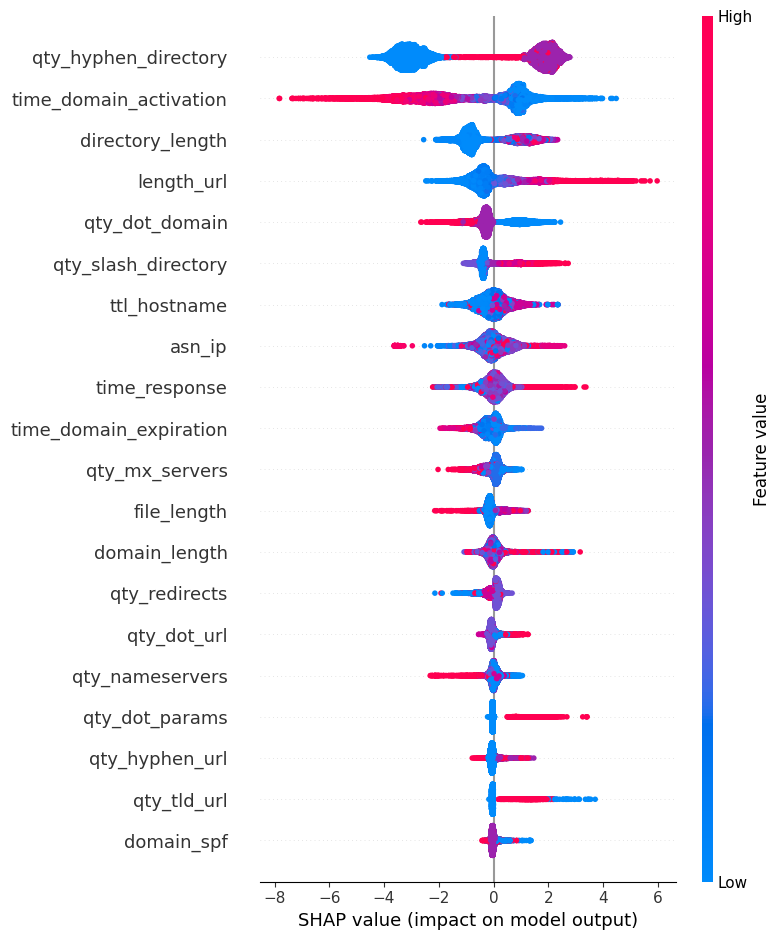

In [91]:
import shap

explainer = shap.Explainer(best_xgb)
shap_values = explainer(X_test)

# Summary plot (global importance)
shap.summary_plot(shap_values, X_test)

SHAP values seems to concordate with the Importance values found earlier.

Fraudulent domains might have:  
- High values of qty_hyphen_directory
- Low values of time_domain_activation


## Dimension Reduction impact

Let's study how Random Forest and XGBoost behave with feature reduction. This may improve Random Forest training time.

In [34]:
from sklearn.decomposition import PCA

### Perform PCA Reduction

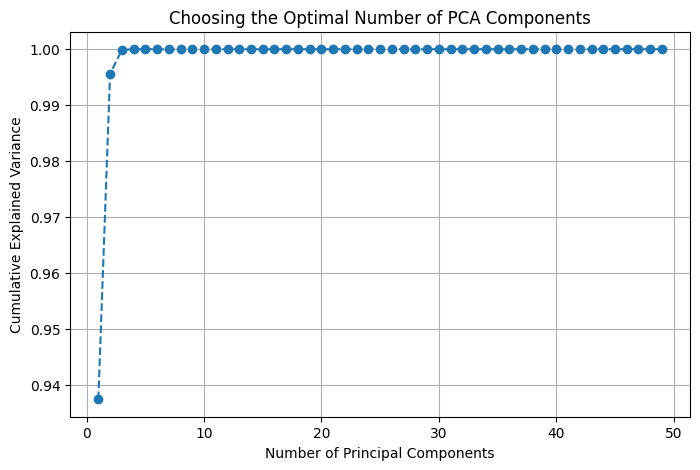

In [35]:
# Let's study the cumulative explained variance to determine the optimal number
# of components

pca = PCA().fit(X_train)

cumulative_variance = np.cumsum(pca.explained_variance_ratio_)


plt.figure(figsize=(8,5))
plt.plot(range(1, len(cumulative_variance)+1), cumulative_variance, marker='o', linestyle='--')
plt.xlabel("Number of Principal Components")
plt.ylabel("Cumulative Explained Variance")
plt.title("Choosing the Optimal Number of PCA Components")
plt.grid(True)
plt.show()

According to the elbow point, only 2 components would be sufficients.

In [36]:
# Keep only enough components to explain 95% variance
pca = PCA(n_components=0.95)
X_train_pca = pca.fit_transform(X_train)
X_test_pca = pca.transform(X_test)

print(f"Optimal number of components: {pca.n_components_}")

Optimal number of components: 2


### Evaluation of XGBoost and Random Forest

In [37]:
# XGBoost on PCA reduced dataset

xgb_pca = XGBClassifier(
    use_label_encoder=False,
    objective="binary:logistic",
    eval_metric="logloss",
    random_state=42
)

# Measure training time
start_time = time.time()
xgb_pca.fit(X_train_pca, y_train)
train_time_xgb_pca = time.time() - start_time

# Evaluate
y_pred_xgb_pca = xgb_pca.predict(X_test_pca)
f1_xgb_pca = f1_score(y_test, y_pred_xgb_pca, average="weighted")
fpr_xgb_pca = compute_fnr(y_test, y_pred_xgb_pca)

print(f"F1-score on PCA reduced dataset: {f1_xgb_pca}")
print(f"False Negative Rate (FNR) on PCA reduced dataset: {fpr_xgb_pca}")

/usr/local/lib/python3.11/dist-packages/xgboost/core.py:158: UserWarning: [22:02:50] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)


F1-score on PCA reduced dataset: 0.799791455998423
False Negative Rate (FNR) on PCA reduced dataset: 0.2301073913572741


In [39]:
# Random Forest

rf_pca = RandomForestClassifier(n_estimators=10, random_state=42)
start_time = time.time()
rf_pca.fit(X_train_pca, y_train)
train_time_rf_pca = time.time() - start_time

y_pred_rf_pca = rf_pca.predict(X_test_pca)
f1_rf_pca = f1_score(y_test, y_pred_rf_pca, average="weighted")
fpr_rf_pca = compute_fnr(y_test, y_pred_rf_pca)

print(f"F1-score on PCA reduced dataset: {f1_rf_pca}")
print(f"False Negative Rate (FNR) on PCA reduced dataset: {fpr_rf_pca}")

F1-score on PCA reduced dataset: 0.8440315337012497
False Negative Rate (FNR) on PCA reduced dataset: 0.17961244339562832


In [46]:
pca_df = pd.DataFrame({
    "Model": ["XGBoost (PCA)", "Random Forest (PCA)"],
    "F1-score": [f1_xgb_pca,f1_rf_pca],
    "Training Time (seconds)": [train_time_xgb_pca, train_time_rf_pca],
    "False Negative Rate (FNR)": [fpr_xgb_pca, fpr_rf_pca]
})


# concat with merged_df
merged_df = pd.concat([merged_df, pca_df], ignore_index=True)
merged_df.to_csv("merged_df.csv", index=False)

<ipython-input-19-c345416bbe03>:7: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x="Model", y="F1-score", data=df, palette="coolwarm")
<ipython-input-19-c345416bbe03>:13: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x="Model", y="False Negative Rate (FNR)", data=df, palette="viridis")
<ipython-input-19-c345416bbe03>:19: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x="Model", y="Training Time (seconds)", data=df, palette="magma")


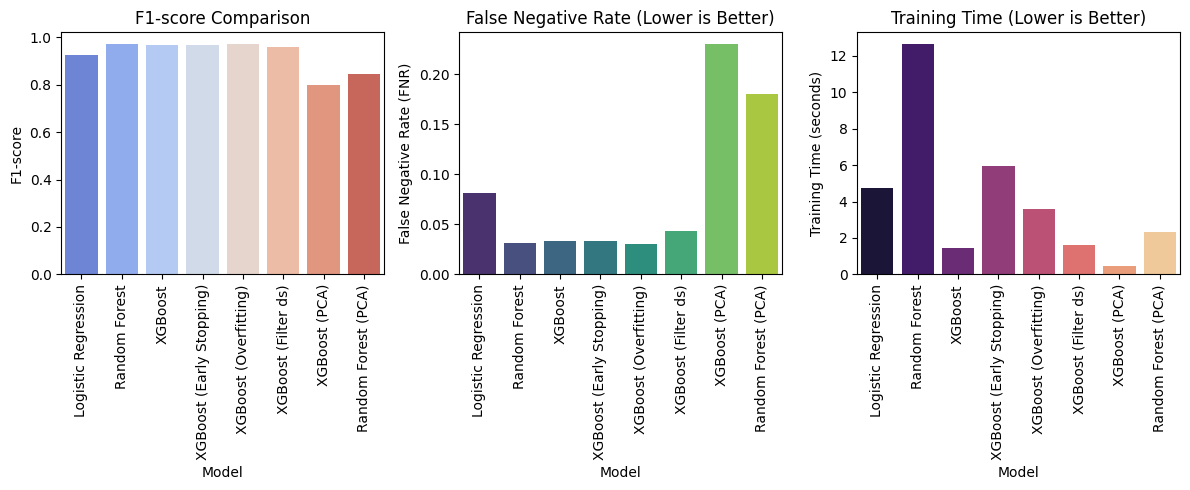

In [47]:
plot_comparison(merged_df)

results are not convincing as even if training times are significantly faster, the performances decreased.

## New Metric:

Let's specialize the trainingmetric into the aim of minimizing the False Negative Rate.